# 🧠 Customer Churn Prediction

This project focuses on predicting whether a customer will **churn (exit)** the bank service using machine learning models.

## 📊 Dataset Summary

- 10,000+ customer records  
- Features: Age, Gender, Geography, Balance, NumOfProducts  
- Target: `Exited` (1 = churned, 0 = retained)

## 🧼 Preprocessing Summary

- Dropped unimportant columns like `CustomerId`, `Surname`
- Used `SMOTE` to balance data
- Scaled numerical columns using `StandardScaler`


## 🔍 Exploratory Data Analysis(EDA):

In [217]:
import pandas as pd
df= pd.read_csv('Churn_Modelling.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [218]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [219]:
df.shape

(10002, 14)

In [220]:
df=df.drop(['RowNumber','Surname','CustomerId'],axis=1)


In [221]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [222]:
df=df.dropna()
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [223]:
df['Exited'].value_counts()

Exited
0    7960
1    2038
Name: count, dtype: int64

In [224]:
df['Exited'].value_counts(normalize=True)*100

Exited
0    79.615923
1    20.384077
Name: proportion, dtype: float64

In [225]:
df['Gender'].value_counts()

Gender
Male      5455
Female    4543
Name: count, dtype: int64

In [226]:
df['Geography'].value_counts()

Geography
France     5012
Germany    2510
Spain      2476
Name: count, dtype: int64

In [227]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df.head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42.00,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,1,41.00,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,1,42.00,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,1,39.00,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,0,44.00,8,113755.78,2,1.0,0.0,149756.71,1
7,376,Germany,1,29.00,4,115046.74,4,1.0,0.0,119346.88,1
10,528,France,0,31.00,6,102016.72,2,0.0,0.0,80181.12,0
11,497,Spain,0,24.00,3,0.00,2,1.0,0.0,76390.01,0
12,476,France,1,34.00,10,0.00,2,1.0,0.0,26260.98,0
13,549,France,1,25.00,5,0.00,2,0.0,0.0,190857.79,0


In [228]:
df1=df.copy()
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,1,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,0,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [229]:
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False
1,608,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True
2,502,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False
3,699,1,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False
5,645,0,44.0,8,113755.78,2,1.0,0.0,149756.71,1,False,True


In [230]:
df['Geography_Germany']=df['Geography_Germany'].astype(int)
df['Geography_Spain']=df['Geography_Spain'].astype(int)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42.0,2,0.00,1,1.0,1.0,101348.88,1,0,0
1,608,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,1
2,502,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1,0,0
3,699,1,39.0,1,0.00,2,0.0,0.0,93826.63,0,0,0
5,645,0,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0,1


In [231]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']


In [232]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,stratify=y,random_state=42)

In [233]:
print(x_train.shape,x_test.shape)
print(y_train.value_counts(normalize=True))

(7998, 11) (2000, 11)
Exited
0    0.796199
1    0.203801
Name: proportion, dtype: float64


### ⚖️ Using SMOTE for imbalance handling

In [234]:
!pip install -U imbalanced-learn

# Restarting import
from imblearn.over_sampling import SMOTE

# Test if SMOTE works
print("SMOTE imported:", SMOTE)


In [235]:
smote= SMOTE(random_state=42)
x_resampled,y_resampled= smote.fit_resample(x_train,y_train)


In [236]:
print("after smote : ",pd.Series(y_resampled).value_counts())

after smote :  Exited
0    6368
1    6368
Name: count, dtype: int64


### 🔍 Logistic Regression

This is a baseline linear model. It’s easy to interpret but may not perform well with complex, nonlinear patterns.


In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_resampled)
x_test_scaled= scaler.transform(x_test)
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_resampled)

LogisticRegression(max_iter=1000)

In [238]:
y_pred=model.predict(x_test_scaled)

In [239]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score


In [240]:
print("confusion matrix :\n ", confusion_matrix(y_test,y_pred))

confusion matrix :
  [[1113  479]
 [ 141  267]]


In [241]:
print("classification_report: \n ", classification_report(y_test,y_pred))

classification_report: 
                precision    recall  f1-score   support

           0       0.89      0.70      0.78      1592
           1       0.36      0.65      0.46       408

    accuracy                           0.69      2000
   macro avg       0.62      0.68      0.62      2000
weighted avg       0.78      0.69      0.72      2000



In [242]:
print("roc_auc_score: \n", roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1]))

roc_auc_score: 
 0.7333019262981574


### 🌳 Random Forest

An ensemble tree-based model that handles nonlinear data well. We check if it improves recall.


In [243]:
from sklearn.ensemble import RandomForestClassifier


In [244]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [245]:
rf_pred= rf_model.predict(x_test)

In [246]:
rf_probs = rf_model.predict_proba(x_test)[:, 1]

In [247]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [248]:
print("confusion_matrix : \n", confusion_matrix(y_test,rf_pred))

confusion_matrix : 
 [[1520   72]
 [ 210  198]]


In [249]:
print("classification report : \n",classification_report(y_test,rf_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1592
           1       0.73      0.49      0.58       408

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [250]:
print("roc_auc_score : \n", roc_auc_score(y_test,rf_probs))

roc_auc_score : 
 0.8570271701645483


### 🚀 XGBoost

A powerful boosting algorithm often used in Kaggle competitions. We train it to see if boosting helps improve performance.


In [251]:
!pip install xgboost



In [252]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier(eval_metric= 'logloss',random_state=42)

In [253]:
xgb_model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [254]:
x_pred= xgb_model.predict(x_test)
x_prob= xgb_model.predict_proba(x_test)[:,1]

In [255]:
print("confusion matrix : \n",confusion_matrix(y_test,x_pred))

confusion matrix : 
 [[1493   99]
 [ 203  205]]


In [256]:
print("classification_report : \n", classification_report(y_test,x_pred))

classification_report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1592
           1       0.67      0.50      0.58       408

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [257]:
print("roc_auc_score : \n",roc_auc_score(y_test,x_prob))

roc_auc_score : 
 0.8479252882057347


### 💡 LightGBM

LightGBM is a fast, distributed gradient boosting framework by Microsoft.  
It performs well on large datasets and handles categorical features efficiently.

We train LightGBM here to compare its performance against other models.


In [258]:
!pip install lightgbm


In [259]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)
y_pred_lgb = lgb_model.predict(x_test)

print("LightGBM Results:")
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 1630, number of negative: 6368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 7998, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203801 -> initscore=-1.362705
[LightGBM] [Info] Start training from score -1.362705
LightGBM Results:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1592
           1       0.69      0.50      0.58       408

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [260]:
print("roc_auc_score : \n", roc_auc_score(y_test,lgb_model.predict_proba(x_test)[:,1]))

roc_auc_score : 
 0.8649882377574144


### 🐱 CatBoost

Optimized for categorical features, CatBoost is known for high performance with less preprocessing. We compare its results.


In [261]:
!pip install catboost

In [262]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(x_train,y_train)
y_predcat = cat_model.predict(x_test)
print("classification_report : \n", classification_report(y_test,y_predcat))

classification_report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1592
           1       0.75      0.52      0.61       408

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [263]:
print("roc_auc_score : \n", roc_auc_score(y_test,cat_model.predict_proba(x_test)[:,1]))

roc_auc_score : 
 0.8716360602029757


In [264]:
import pandas as pd
model_results = pd.DataFrame({
    'Model':['Logistic Regression', 'Random Forest','XGBoost','Lightgbm','Catboost'],
    'precision':[0.36,0.73,0.67,0.69, 0.75],
    'Recall(churn)':[0.65,0.49,0.50,0.50,0.52],
    'F1-score':[0.46,0.58,0.58,0.58,0.61],
    'ROC AUC':[0.73, 0.85,0.84,0.86, 0.87]})
print(model_results)

                 Model  precision  Recall(churn)  F1-score  ROC AUC
0  Logistic Regression       0.36           0.65      0.46     0.73
1        Random Forest       0.73           0.49      0.58     0.85
2              XGBoost       0.67           0.50      0.58     0.84
3             Lightgbm       0.69           0.50      0.58     0.86
4             Catboost       0.75           0.52      0.61     0.87


## 📊 Model Comparison Table

| Model               | Precision | Recall (Churn) | F1-Score | ROC AUC |
|---------------------|-----------|----------------|----------|---------|
| Logistic Regression | 0.36      | 0.65           | 0.46     | 0.73    |
| Random Forest       | 0.73      | 0.49           | 0.58     | 0.85    |
| XGBoost             | 0.67      | 0.50           | 0.58     | 0.84    |
| LightGBM            | 0.69      | 0.50           | 0.58     | 0.86    |
| CatBoost            | 0.75      | 0.52           | 0.61     | 0.87 ✅ |

### conclusion:
*we can see that catboost has highest roc_auc score*             


## 📈 ROC Curve Comparison

We compare ROC curves of top models to visualize their performance.


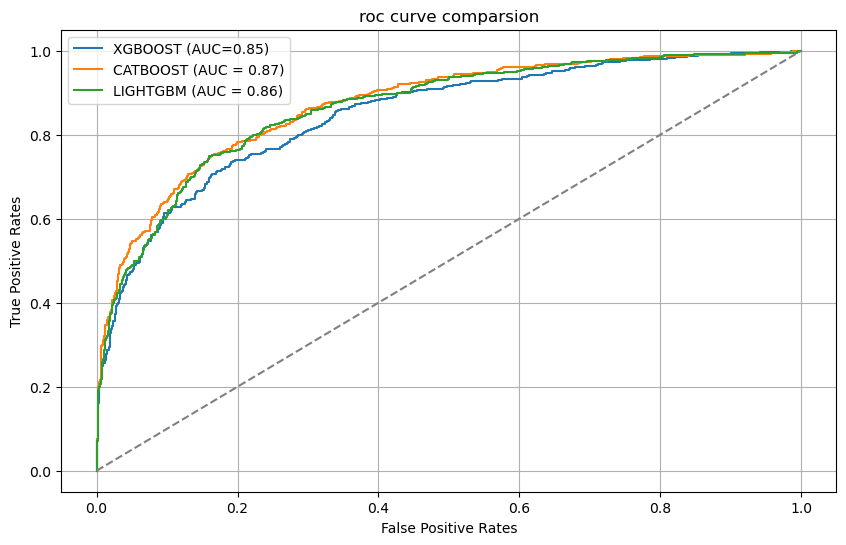

In [265]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
xgb_probs1=xgb_model.predict_proba(x_test)[:,1]
cat_probs1=cat_model.predict_proba(x_test)[:,1]
lgb_probs1=lgb_model.predict_proba(x_test)[:,1]

fpr_xgb,tpr_xgb,_=roc_curve(y_test,xgb_probs1)
fpr_cat,tpr_cat,_=roc_curve(y_test,cat_probs1)
fpr_lgb,tpr_lgb,_=roc_curve(y_test,lgb_probs1)

plt.figure(figsize=(10,6))
plt.plot(fpr_xgb,tpr_xgb,label='XGBOOST (AUC={:.2F})'.format(roc_auc_score(y_test,xgb_probs1)))
plt.plot(fpr_cat,tpr_cat,label='CATBOOST (AUC = {:.2f})'.format(roc_auc_score(y_test,cat_probs1)))
plt.plot(fpr_lgb,tpr_lgb,label='LIGHTGBM (AUC = {:.2f})'.format(roc_auc_score(y_test,lgb_probs1)))
plt.plot([0,1] ,[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('roc curve comparsion')
plt.legend()
plt.grid()
plt.show()

### 🔥 Feature Importance (CatBoost)

We extract and plot important features that affect churn predictions.


In [266]:
f_important=cat_model.feature_importances_

In [267]:
f_name=x_train.columns

In [268]:
fd= pd.DataFrame({
    'Feature Name ': f_name,
    'importance':f_important})
fd=fd.sort_values(by='importance',ascending=False)
print(fd)

        Feature Name   importance
2                 Age   20.252331
5       NumOfProducts   19.630367
4             Balance   14.602866
0         CreditScore   10.657427
8     EstimatedSalary    9.971506
3              Tenure    6.579852
7      IsActiveMember    6.326612
9   Geography_Germany    6.172807
1              Gender    2.644229
10    Geography_Spain    2.086268
6           HasCrCard    1.075735


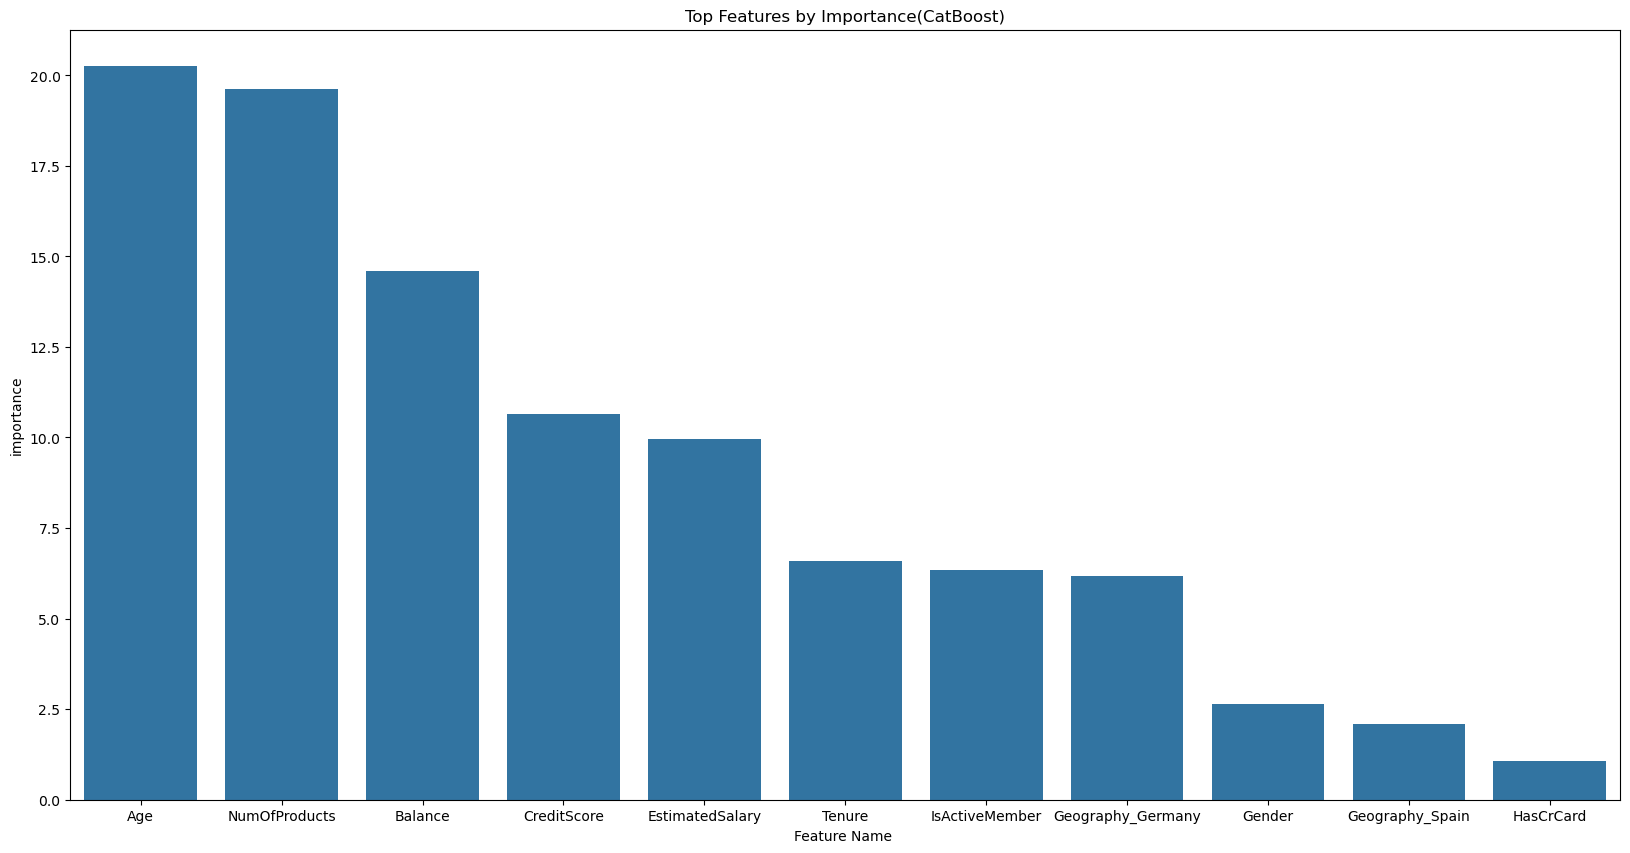

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(y='importance',x='Feature Name ', data=fd)
plt.title('Top Features by Importance(CatBoost)')
plt.show()

### 📊 Churn Rate vs Number of Products

Let's analyze if customers with fewer products are more likely to churn.


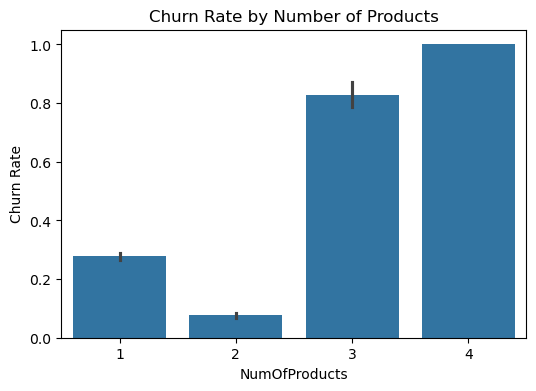

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='NumOfProducts', y='Exited')
plt.title('Churn Rate by Number of Products')
plt.ylabel('Churn Rate')
plt.show()


### 📊 Churn vs IsActiveMember

Are inactive customers more likely to churn?


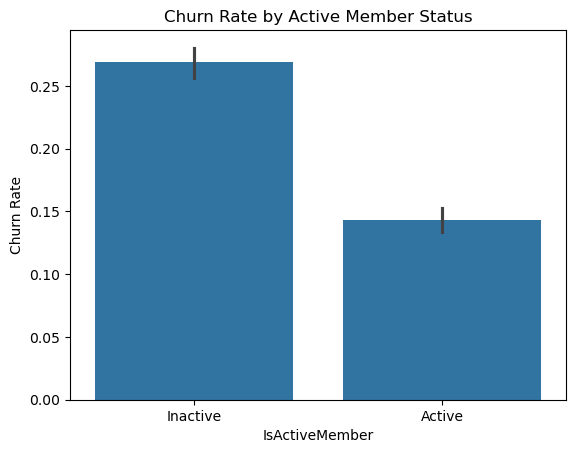

In [271]:
sns.barplot(data=df, x='IsActiveMember', y='Exited')
plt.title('Churn Rate by Active Member Status')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.show()


### 📊 Churn vs Balance

Does churn vary with customer account balance?


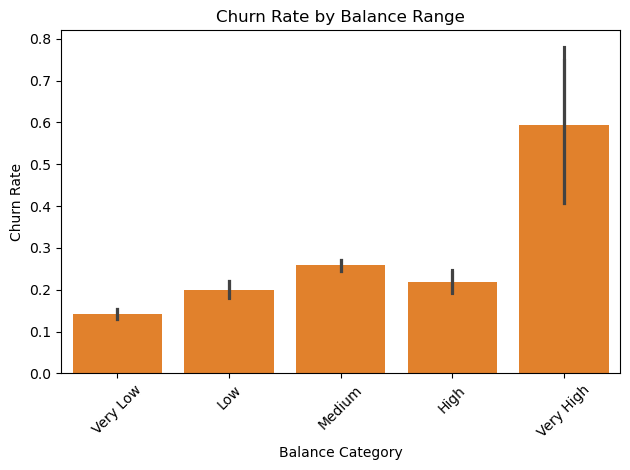

In [279]:
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['BalancedBin'] = pd.cut(df['Balance'], bins=5, labels=labels, include_lowest=True)
sns.barplot(data=df, x='BalancedBin', y='Exited', order=labels)
sns.barplot(data=df,x='BalancedBin',y='Exited')
plt.title('Churn Rate by Balance Range')
plt.xlabel('Balance Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🌍 Churn by Geography

Does churn vary by customer location?


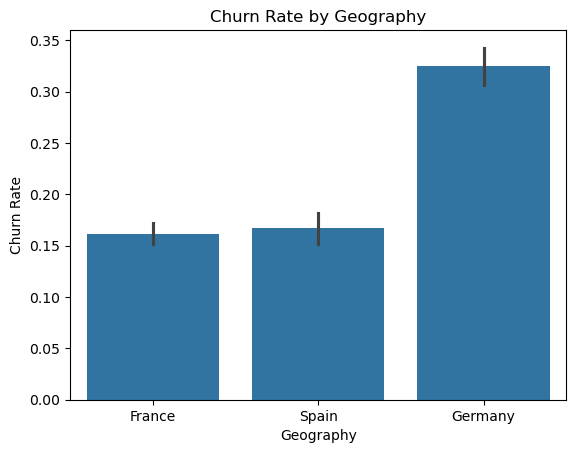

In [273]:
sns.barplot(data=df1, x='Geography', y='Exited')
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.show()


### 👴 Churn by Age Group

Are older customers more likely to churn?


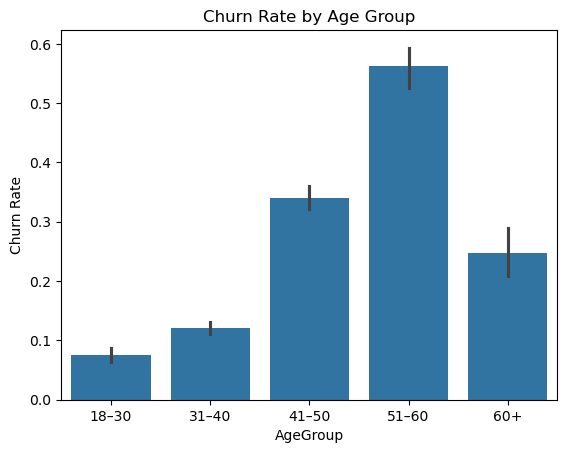

In [274]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], 
                        labels=['18–30', '31–40', '41–50', '51–60', '60+'])

sns.barplot(data=df, x='AgeGroup', y='Exited')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.show()


## 🔍 Explainability with SHAP

To make the churn prediction model transparent and stakeholder-friendly, SHAP was used for:

- 📊 Global feature importance ranking using SHAP summary plots
- 🧠 Individual prediction explanations using SHAP force plots
- 📈 Business-level insight extraction for action planning


In [275]:
!pip install SHAP

In [276]:
import shap
x_sample=x_test.sample(100,random_state=42)

explainer= shap.TreeExplainer(cat_model)
shap_values=explainer.shap_values(x_sample)


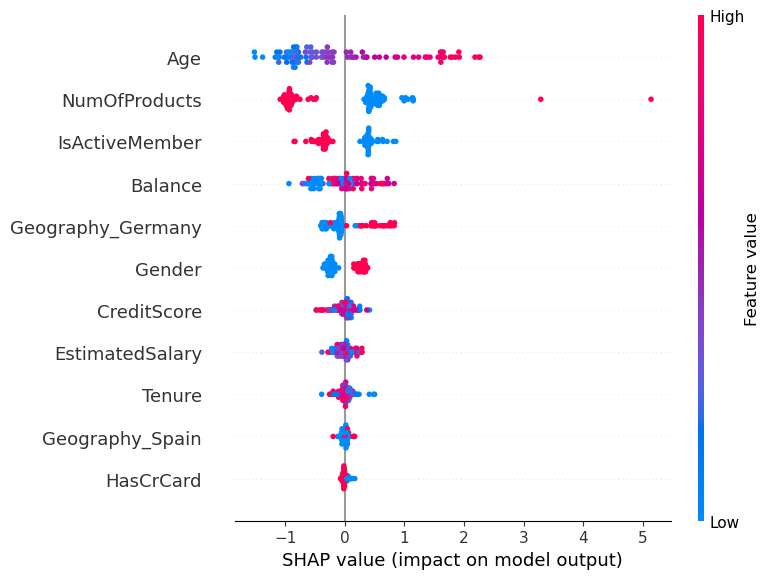

In [277]:
shap.summary_plot(shap_values,x_sample)

### 📊 Interpretation:
- Red = high feature value, Blue = low
- SHAP value (x-axis) shows how much each feature pushes toward churn (positive) or retention (negative)
- Top drivers: Age, NumOfProducts, Activity status, Balance


In [278]:
#This code doesnt run/visualize on github , It works normally in jupter etc.Hence a visual of its result is given below
#shap.initjs()
#customer = x_sample.iloc[0]
#shap.force_plot(explainer.expected_value,shap_values[0],customer)

### 🧠 SHAP Force Plot (Single Customer Prediction)

This force plot explains an individual prediction:
- Features pushing toward **churn** are shown in **red**
- Features pulling toward **no churn** are shown in **blue**

![SHAP Force Plot](./force_plot.png)

> 📌 This image was taken as a screenshot of the original interactive SHAP force plot (which doesn't render on GitHub).


### 🧠 Interpretation(One Customer):
- Visual "tug-of-war" between features increasing churn (red) vs. reducing it (blue)
- Final prediction: very low churn probability due to factors like young age, high activity, long tenure


## 📈 Business Insights

### 📊 From EDA & Feature Analysis
- Customers with high tenure and balance were less likely to churn
- Geography and activity status had strong correlation with churn
- Gender showed minor influence, Credit Score had moderate impact

---

### 🔍 From SHAP Model Interpretability
- High Age, low activity, low balance, and customers from Germany drive churn
- Young, active customers with higher balance and multiple products are more likely to stay
- SHAP confirmed some EDA patterns and added model-based confirmation

## ✅ Conclusion

In this project, we developed a churn prediction model using real-world customer banking data. After preprocessing, model training, and evaluation, we explored **model explainability** using SHAP values to ensure transparency and trust.

### 🔍 Key Outcomes:
- **CatBoost** model provided strong performance in predicting churn, with high recall for identifying at-risk customers.
- **SHAP Summary Plots** revealed that `Age`, `IsActiveMember`,`Balance` and `NumOfProducts` are the top features influencing churn.
- **SHAP Force Plots** gave clear, individualized explanations showing which features caused each customer to churn or not.
- Business-level insights extracted from SHAP allowed for more strategic, targeted decision-making (e.g., focus on inactive older customers from Germany).

### 🧠 Final Insight:
> Combining data-driven EDA with model-driven SHAP explanations provides a complete and interpretable view of *who* is churning and *why* — enabling more focused and effective intervention strategies.

